In [2]:
import numpy as np
import xarray as xr
import glob
from functools import partial
from matplotlib import pyplot as plt

# Lisa's tools
import sys 
path_tools = '/home1/datahome/ljessel/Scripts/'   # path to the toolkit directory
sys.path.append(path_tools)
from map_SAR_variables_toolkit.sar_tools.sar import preprocess_sar, map_sar

# 0) Loading file

In [3]:
path = '/home/datawork-cersat-public/cache/project/sarwave/data/products/tests/iw/slc/l1b/3.7/'
safe = 'S1B_IW_XSP__1SDV_20210823T181301_20210823T181328_028377_0362CD_1745.SAFE'
fns = glob.glob(path+safe+'/*iw1*vv*.nc')

print(fns)

['/home/datawork-cersat-public/cache/project/sarwave/data/products/tests/iw/slc/l1b/3.7/S1B_IW_XSP__1SDV_20210823T181301_20210823T181328_028377_0362CD_1745.SAFE/s1b-iw1-slc-vv-20210823t181301-20210823t181327-028377-0362cd-004_L1B_xspec_IFR_3.7.nc']


# 1) With the intra grp 

## 1.1) Selection & preprocess of the dataset grp 

In [4]:
### Visualisation of the "raw" dataset 
ds0 = xr.open_mfdataset(fns, group='intraburst')
display(ds0)
#ds0.footprint

<xarray.Dataset> Size: 51MB
Dimensions:                   (burst: 9, tile_line: 1, tile_sample: 4,
                               bt_thresh: 5, freq_sample: 396, freq_line: 50,
                               0tau: 3, 1tau: 2, 2tau: 1, c_sample: 2,
                               c_line: 2, k_gp: 4, phi_hf: 5,
                               lambda_range_max_macs: 1)
Coordinates:
    pol                       <U2 8B ...
  * burst                     (burst) int16 18B 0 1 2 3 4 5 6 7 8
  * bt_thresh                 (bt_thresh) int16 10B 5 50 100 150 200
    k_rg                      (burst, tile_sample, freq_sample) float32 57kB dask.array<chunksize=(9, 4, 396), meta=np.ndarray>
    k_az                      (freq_line) float32 200B dask.array<chunksize=(50,), meta=np.ndarray>
    line                      (burst, tile_line) int16 18B dask.array<chunksize=(9, 1), meta=np.ndarray>
    sample                    (burst, tile_sample) int16 72B dask.array<chunksize=(9, 4), meta=np.ndarray>
    longitude                 (burst, tile_line, tile_sample) float32 144B dask.array<chunksize=(9, 1, 4), meta=np.ndarray>
    latitude                  (burst, tile_line, tile_sample) float32 144B dask.array<chunksize=(9, 1, 4), meta=np.ndarray>
  * k_gp                      (k_gp) int16 8B 1 2 3 4
  * phi_hf                    (phi_hf) int16 10B 1 2 3 4 5
  * lambda_range_max_macs     (lambda_range_max_macs) float32 4B 50.0
Dimensions without coordinates: tile_line, tile_sample, freq_sample, freq_line,
                                0tau, 1tau, 2tau, c_sample, c_line
Data variables: (12/32)
    incidence                 (burst, tile_line, tile_sample) float32 144B dask.array<chunksize=(9, 1, 4), meta=np.ndarray>
    ground_heading            (burst, tile_line, tile_sample) float32 144B dask.array<chunksize=(9, 1, 4), meta=np.ndarray>
    sensing_time              (burst, tile_line, tile_sample) datetime64[ns] 288B dask.array<chunksize=(9, 1, 4), meta=np.ndarray>
    sigma0                    (burst, tile_line, tile_sample) float32 144B dask.array<chunksize=(9, 1, 4), meta=np.ndarray>
    nesz                      (burst, tile_line, tile_sample) float32 144B dask.array<chunksize=(9, 1, 4), meta=np.ndarray>
    bright_targets_histogram  (burst, tile_line, tile_sample, bt_thresh) int16 360B dask.array<chunksize=(9, 1, 4, 5), meta=np.ndarray>
    ...                        ...
    xspectra_1tau_Re          (burst, tile_line, tile_sample, freq_line, freq_sample, 1tau) float32 6MB dask.array<chunksize=(9, 1, 4, 50, 396, 2), meta=np.ndarray>
    xspectra_1tau_Im          (burst, tile_line, tile_sample, freq_line, freq_sample, 1tau) float32 6MB dask.array<chunksize=(9, 1, 4, 50, 396, 2), meta=np.ndarray>
    xspectra_2tau_Re          (burst, tile_line, tile_sample, freq_line, freq_sample, 2tau) float32 3MB dask.array<chunksize=(9, 1, 4, 50, 396, 1), meta=np.ndarray>
    xspectra_2tau_Im          (burst, tile_line, tile_sample, freq_line, freq_sample, 2tau) float32 3MB dask.array<chunksize=(9, 1, 4, 50, 396, 1), meta=np.ndarray>
    macs_Re                   (burst, tile_line, tile_sample, lambda_range_max_macs, 2tau) float32 144B dask.array<chunksize=(9, 1, 4, 1, 1), meta=np.ndarray>
    macs_Im                   (burst, tile_line, tile_sample, lambda_range_max_macs, 2tau) float32 144B dask.array<chunksize=(9, 1, 4, 1, 1), meta=np.ndarray>
Attributes: (12/24)
    name:                   SENTINEL1_DS:/home/datawork-cersat-public/project...
    short_name:             SENTINEL1_DS:S1B_IW_SLC__1SDV_20210823T181301_202...
    product:                SLC
    safe:                   S1B_IW_SLC__1SDV_20210823T181301_20210823T181328_...
    swath:                  IW
    multidataset:           False
    ...                     ...
    radar_frequency:        5405000454.33435
    azimuth_time_interval:  0.002055556299999998
    tile_width_sample:      17500
    tile_width_line:        17500
    tile_overlap_sample:    0
    tile_overlap_line:      0

<div class="alert alert-block alert-warning">
<b>Important note:</b> to use preprocess_sar, the netCDFs should contain footprint, start_date and stop_date attributes.
</div>

In [7]:
### the wanted variables to keep in the netCDF
varn = ['sigma0_filt']  

partial_func = partial(preprocess_sar, varn=varn)  # preprocessing of the "raw" netcdf

### preprocessing of the "raw" dataset
ds_intra = xr.open_mfdataset(fns,preprocess = partial_func,combine='nested',concat_dim='swath', group='intraburst')
#ds = xr.open_mfdataset(fns,preprocess = partial_func,combine='nested',concat_dim='swath',group='intraburst').load()    # case with group 

In [5]:
display(ds_intra)

<xarray.Dataset> Size: 2kB
Dimensions:           (swath: 1, burst: 9, tile_line: 1, tile_sample: 4,
                       c_sample: 2, c_line: 2, fprt: 10)
Coordinates:
    pol               <U2 8B ...
  * burst             (burst) int16 18B 0 1 2 3 4 5 6 7 8
    line              (burst, tile_line) int16 18B dask.array<chunksize=(9, 1), meta=np.ndarray>
    sample            (burst, tile_sample) int16 72B dask.array<chunksize=(9, 4), meta=np.ndarray>
    longitude         (burst, tile_line, tile_sample) float32 144B dask.array<chunksize=(9, 1, 4), meta=np.ndarray>
    latitude          (burst, tile_line, tile_sample) float32 144B dask.array<chunksize=(9, 1, 4), meta=np.ndarray>
  * tile_line         (tile_line) int64 8B 0
  * tile_sample       (tile_sample) int64 32B 0 1 2 3
  * fprt              (fprt) int64 80B 0 1 2 3 4 5 6 7 8 9
Dimensions without coordinates: swath, c_sample, c_line
Data variables:
    sigma0_filt       (swath, burst, tile_line, tile_sample) float32 144B dask.array<chunksize=(1, 9, 1, 4), meta=np.ndarray>
    corner_latitude   (swath, burst, tile_line, tile_sample, c_sample, c_line) float32 576B dask.array<chunksize=(1, 9, 1, 4, 2, 2), meta=np.ndarray>
    corner_longitude  (swath, burst, tile_line, tile_sample, c_sample, c_line) float32 576B dask.array<chunksize=(1, 9, 1, 4, 2, 2), meta=np.ndarray>
    land_flag         (swath, burst, tile_line, tile_sample) bool 36B dask.array<chunksize=(1, 9, 1, 4), meta=np.ndarray>
    footprt           (swath, fprt) float64 80B -7.253 47.83 ... -7.253 47.83
    start             (swath) datetime64[ns] 8B 2021-08-23T18:13:01
    stop              (swath) datetime64[ns] 8B 2021-08-23T18:13:27
Attributes: (12/24)
    name:                   SENTINEL1_DS:/home/datawork-cersat-public/project...
    short_name:             SENTINEL1_DS:S1B_IW_SLC__1SDV_20210823T181301_202...
    product:                SLC
    safe:                   S1B_IW_SLC__1SDV_20210823T181301_20210823T181328_...
    swath:                  IW
    multidataset:           False
    ...                     ...
    radar_frequency:        5405000454.33435
    azimuth_time_interval:  0.002055556299999998
    tile_width_sample:      17500
    tile_width_line:        17500
    tile_overlap_sample:    0
    tile_overlap_line:      0

<div class="alert alert-block alert-info">
<b>Tip:</b> if the wanted variable as a dimension other than positional dimensions (burst,tile_line,tile_sample), e.g., (burst,tile_line,tile_sample,<b>2tau</b>), you can specify the value of the new dimension to be selected. For instance, 
    
```python
varn = ['macs_Im']
dims_sel = {'lambda_range_max_macs':50,'2tau':0}
partial_func = partial(preprocess_sar, varn=varn,dims_sel = dims_sel)
ds = xr.open_mfdataset(fn,combine    = 'nested',concat_dim = 'swath',preprocess = partial_func,group='intraburst').load()
```

</div>

## 1.2) Plotting SAR 

<div class="alert alert-block alert-warning">
<b>Important note:</b> to be able to plot SAR geometries, the netCDFs should contain corner_latitude and corner_longitude variables
</div>

In [20]:
display(ds_intra['sigma0_filt'])
s0_db = 10*np.log10(ds_intra['sigma0_filt'])          # sigma0 filtered in dB
ds_intra['s0_filt_db'] = s0_db 
display(ds_intra)

<xarray.DataArray 'sigma0_filt' (swath: 1, burst: 9, tile_line: 1,
                                 tile_sample: 4)> Size: 144B
dask.array<broadcast_to, shape=(1, 9, 1, 4), dtype=float32, chunksize=(1, 9, 1, 4), chunktype=numpy.ndarray>
Coordinates:
    pol          <U2 8B ...
  * burst        (burst) int16 18B 0 1 2 3 4 5 6 7 8
    line         (burst, tile_line) int16 18B dask.array<chunksize=(9, 1), meta=np.ndarray>
    sample       (burst, tile_sample) int16 72B dask.array<chunksize=(9, 4), meta=np.ndarray>
    longitude    (burst, tile_line, tile_sample) float32 144B dask.array<chunksize=(9, 1, 4), meta=np.ndarray>
    latitude     (burst, tile_line, tile_sample) float32 144B dask.array<chunksize=(9, 1, 4), meta=np.ndarray>
  * tile_line    (tile_line) int64 8B 0
  * tile_sample  (tile_sample) int64 32B 0 1 2 3
Dimensions without coordinates: swath
Attributes:
    long_name:  calibrated sigma0 with BT correction
    units:      linear

<xarray.Dataset> Size: 2kB
Dimensions:           (swath: 1, burst: 9, tile_line: 1, tile_sample: 4,
                       c_sample: 2, c_line: 2, fprt: 10)
Coordinates:
    pol               <U2 8B ...
  * burst             (burst) int16 18B 0 1 2 3 4 5 6 7 8
    line              (burst, tile_line) int16 18B dask.array<chunksize=(9, 1), meta=np.ndarray>
    sample            (burst, tile_sample) int16 72B dask.array<chunksize=(9, 4), meta=np.ndarray>
    longitude         (burst, tile_line, tile_sample) float32 144B dask.array<chunksize=(9, 1, 4), meta=np.ndarray>
    latitude          (burst, tile_line, tile_sample) float32 144B dask.array<chunksize=(9, 1, 4), meta=np.ndarray>
  * tile_line         (tile_line) int64 8B 0
  * tile_sample       (tile_sample) int64 32B 0 1 2 3
  * fprt              (fprt) int64 80B 0 1 2 3 4 5 6 7 8 9
Dimensions without coordinates: swath, c_sample, c_line
Data variables:
    sigma0_filt       (swath, burst, tile_line, tile_sample) float32 144B dask.array<chunksize=(1, 9, 1, 4), meta=np.ndarray>
    corner_latitude   (swath, burst, tile_line, tile_sample, c_sample, c_line) float32 576B dask.array<chunksize=(1, 9, 1, 4, 2, 2), meta=np.ndarray>
    corner_longitude  (swath, burst, tile_line, tile_sample, c_sample, c_line) float32 576B dask.array<chunksize=(1, 9, 1, 4, 2, 2), meta=np.ndarray>
    land_flag         (swath, burst, tile_line, tile_sample) bool 36B dask.array<chunksize=(1, 9, 1, 4), meta=np.ndarray>
    footprt           (swath, fprt) float64 80B -7.253 47.83 ... -7.253 47.83
    start             (swath) datetime64[ns] 8B 2021-08-23T18:13:01
    stop              (swath) datetime64[ns] 8B 2021-08-23T18:13:27
    s0_filt_db        (swath, burst, tile_line, tile_sample) float32 144B dask.array<chunksize=(1, 9, 1, 4), meta=np.ndarray>
Attributes: (12/24)
    name:                   SENTINEL1_DS:/home/datawork-cersat-public/project...
    short_name:             SENTINEL1_DS:S1B_IW_SLC__1SDV_20210823T181301_202...
    product:                SLC
    safe:                   S1B_IW_SLC__1SDV_20210823T181301_20210823T181328_...
    swath:                  IW
    multidataset:           False
    ...                     ...
    radar_frequency:        5405000454.33435
    azimuth_time_interval:  0.002055556299999998
    tile_width_sample:      17500
    tile_width_line:        17500
    tile_overlap_sample:    0
    tile_overlap_line:      0

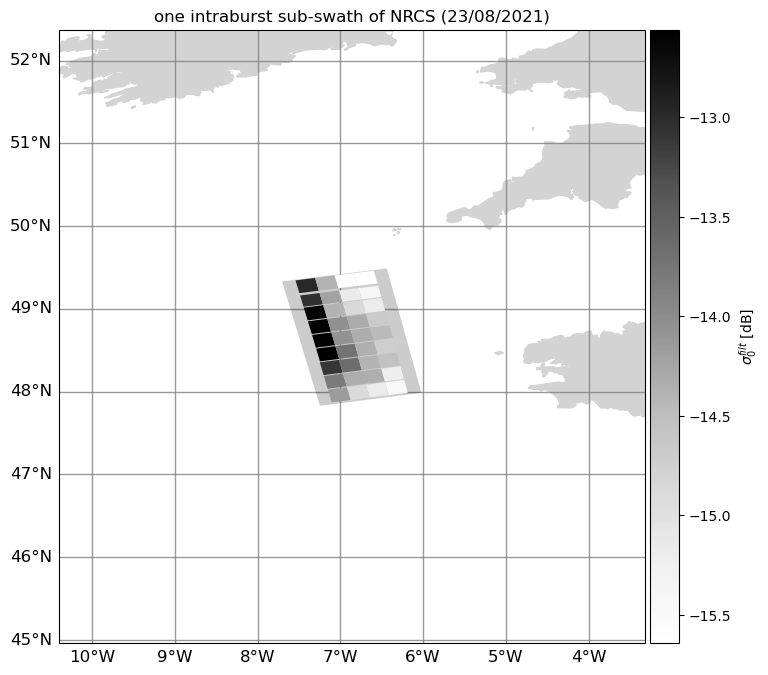

In [23]:
map_sar(ds_intra,'s0_filt_db',         # sigma0 filtered in dB 
        cmap = plt.cm.Greys, 
        land_mask=ds_intra.land_flag, 
        title='one intraburst sub-swath of NRCS (23/08/2021)', 
        clbl=r'$\sigma_0^{filt}$ [dB]')

plt.savefig('/home1/datahome/ljessel/Plots/NRCS_data_discover/nrcs_iw1_intra_23082021T1813.png')

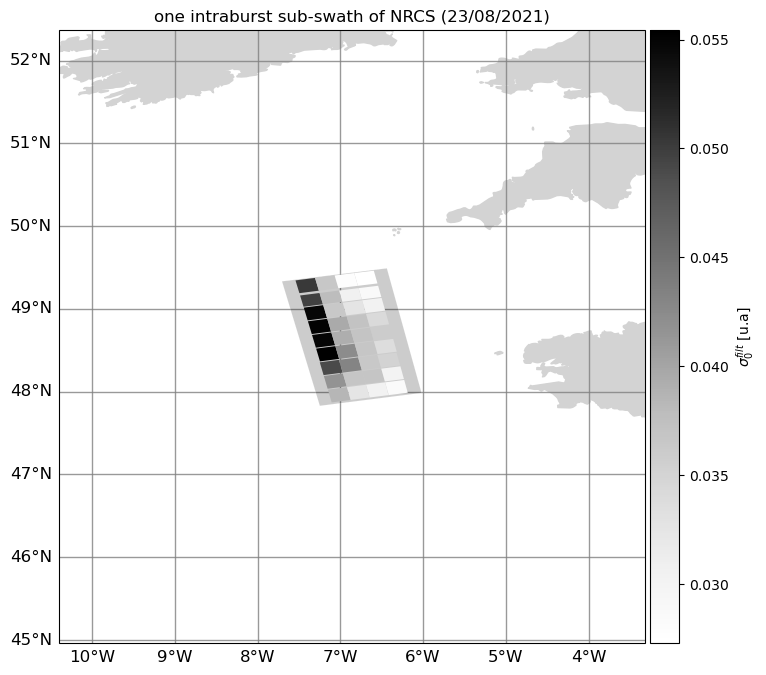

In [12]:
map_sar(ds_intra,'sigma0_filt',         # sigma0 filtered in dB 
        cmap = plt.cm.Greys, 
        land_mask=ds_intra.land_flag, 
        title='one intraburst sub-swath of NRCS (23/08/2021)', 
        clbl=r'$\sigma_0^{filt}$ [u.a]')

plt.savefig('/home1/datahome/ljessel/Plots/NRCS_data_discover/nrcs_iw1_intra_23082021T1813.png')

# 2) With the interburst Grp 

## 2.1) Selection & preprocess of the dataset grp 

In [7]:
ds_inter = xr.open_mfdataset(fns,preprocess = partial_func,combine='nested',concat_dim='swath', group='interburst')
#ds = xr.open_mfdataset(fns,preprocess = partial_func,combine='nested',concat_dim='swath',group='intraburst').load()    # case with group 

In [8]:
display(ds_inter)

<xarray.Dataset> Size: 2kB
Dimensions:           (swath: 1, burst: 8, tile_line: 1, tile_sample: 4,
                       c_sample: 2, c_line: 2, fprt: 10)
Coordinates:
    pol               <U2 8B ...
  * burst             (burst) int16 16B 0 1 2 3 4 5 6 7
    line              (burst, tile_line) int16 16B dask.array<chunksize=(8, 1), meta=np.ndarray>
    sample            (burst, tile_sample) int16 64B dask.array<chunksize=(8, 4), meta=np.ndarray>
    longitude         (burst, tile_line, tile_sample) float32 128B dask.array<chunksize=(8, 1, 4), meta=np.ndarray>
    latitude          (burst, tile_line, tile_sample) float32 128B dask.array<chunksize=(8, 1, 4), meta=np.ndarray>
  * tile_line         (tile_line) int64 8B 0
  * tile_sample       (tile_sample) int64 32B 0 1 2 3
  * fprt              (fprt) int64 80B 0 1 2 3 4 5 6 7 8 9
Dimensions without coordinates: swath, c_sample, c_line
Data variables:
    sigma0_filt       (swath, burst, tile_line, tile_sample) float32 128B dask.array<chunksize=(1, 8, 1, 4), meta=np.ndarray>
    corner_latitude   (swath, burst, tile_line, tile_sample, c_sample, c_line) float32 512B dask.array<chunksize=(1, 8, 1, 4, 2, 2), meta=np.ndarray>
    corner_longitude  (swath, burst, tile_line, tile_sample, c_sample, c_line) float32 512B dask.array<chunksize=(1, 8, 1, 4, 2, 2), meta=np.ndarray>
    land_flag         (swath, burst, tile_line, tile_sample) bool 32B dask.array<chunksize=(1, 8, 1, 4), meta=np.ndarray>
    footprt           (swath, fprt) float64 80B -7.253 47.83 ... -7.253 47.83
    start             (swath) datetime64[ns] 8B 2021-08-23T18:13:01
    stop              (swath) datetime64[ns] 8B 2021-08-23T18:13:27
Attributes: (12/22)
    name:                   SENTINEL1_DS:/home/datawork-cersat-public/project...
    short_name:             SENTINEL1_DS:S1B_IW_SLC__1SDV_20210823T181301_202...
    product:                SLC
    safe:                   S1B_IW_SLC__1SDV_20210823T181301_20210823T181328_...
    swath:                  IW
    multidataset:           False
    ...                     ...
    mean_incidence:         33.62754182022275
    azimuth_time_interval:  0.002055556299999998
    tile_width_sample:      17500
    tile_width_line:        17500
    tile_overlap_sample:    0
    tile_overlap_line:      0

<div class="alert alert-block alert-info">
<b>Tip:</b> if the wanted variable as a dimension other than positional dimensions (burst,tile_line,tile_sample), e.g., (burst,tile_line,tile_sample,<b>2tau</b>), you can specify the value of the new dimension to be selected. For instance, 
    
```python
varn = ['macs_Im']
dims_sel = {'lambda_range_max_macs':50,'2tau':0}
partial_func = partial(preprocess_sar, varn=varn,dims_sel = dims_sel)
ds = xr.open_mfdataset(fn,combine    = 'nested',concat_dim = 'swath',preprocess = partial_func,group='intraburst').load()
```

</div>

## 2.2) Plotting SAR 

<div class="alert alert-block alert-warning">
<b>Important note:</b> to be able to plot SAR geometries, the netCDFs should contain corner_latitude and corner_longitude variables
</div>

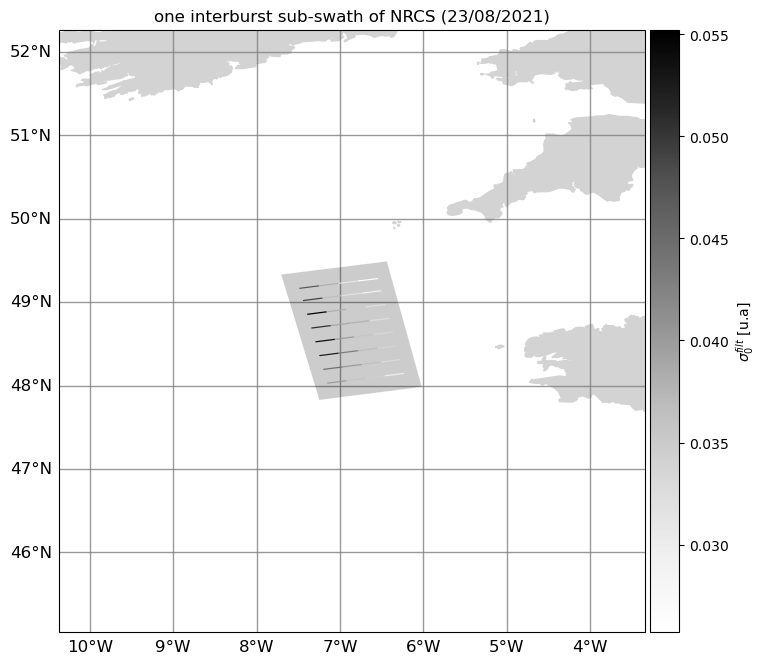

In [9]:
map_sar(ds_inter,'sigma0_filt', 
        cmap = plt.cm.Greys, 
        land_mask=ds_inter.land_flag, 
        title='one interburst sub-swath of NRCS (23/08/2021)', 
        clbl=r'$\sigma_0^{filt}$ [u.a]')

plt.savefig('/home1/datahome/ljessel/Plots/NRCS_data_discover/nrcs_iw1_inter_23082021T1813.png')

# 3) Plotting together

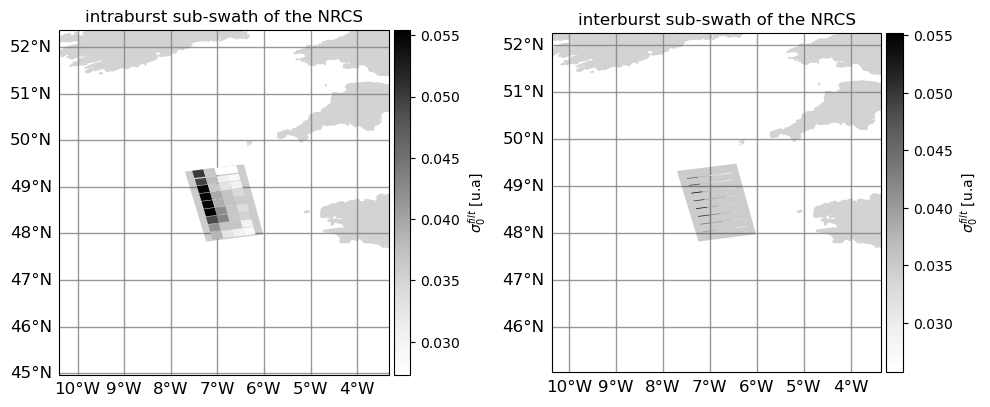

In [10]:
import cartopy.crs as ccrs
proj=ccrs.PlateCarree()

fig = plt.figure(figsize=(10,10))

map_sar(ds_intra,'sigma0_filt',
        ax=fig.add_subplot(1,2,1, projection=proj),
        cmap = plt.cm.Greys,
        land_mask=ds_intra.land_flag,
        title='intraburst sub-swath of the NRCS',
        clbl=r'$\sigma_0^{filt}$ [u.a]')

map_sar(ds_inter,'sigma0_filt',
        ax=fig.add_subplot(1,2,2, projection=proj),
        cmap = plt.cm.Greys,
        land_mask=ds_inter.land_flag,
        title='interburst sub-swath of the NRCS',
        clbl=r'$\sigma_0^{filt}$ [u.a]')


plt.tight_layout()
plt.draw()

plt.savefig('/home1/datahome/ljessel/Plots/NRCS_data_discover/nrcs_iw1_intra&inter_23082021T1813.png')